In [1]:
from sklearn.datasets import load_iris
dados=load_iris()

In [2]:
#dados

In [3]:
import pandas as pd
dadosx=pd.DataFrame(dados.data, columns=dados.feature_names)

In [4]:
dadosy=pd.Series(dados.target)

In [5]:
dadosyencode=pd.get_dummies(dadosy)

In [6]:
dadosyencode.columns=['setosa', 'versicolor', 'virginica']

In [7]:
from sklearn.model_selection import train_test_split
xtreino, xteste, ytreino, yteste=train_test_split(dadosx, dadosyencode, test_size=0.3, random_state=5, shuffle=True)

In [8]:
xtreino.shape

(105, 4)

In [9]:
import tensorflow as tf

In [10]:
#Parametros gerais
learningrate=0.001
#epochs=10
batch_size=105

In [11]:
#Parametros da rede neural
nentrada=4
ncamada1=10
nclasses=3

In [12]:
#pesos e bias da camada1
w1=tf.Variable(tf.random.normal([nentrada,ncamada1],0,0.05, tf.float64)) #media 0, desvio padrao 0.05
b1=tf.Variable(tf.zeros([ncamada1], tf.float64))
#pesos e bias da camada de saida
wout=tf.Variable(tf.random.normal([ncamada1,nclasses],0,0.05, tf.float64))
bout=tf.Variable(tf.zeros([nclasses], tf.float64))

In [13]:
b1

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>

In [13]:
#Função de custo
#custo=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=saida,labels=ytreino))
@tf.function
def cost(w1, b1, wout, bout):
    #Pesos da camada1
    layer1=tf.nn.relu(tf.add(tf.matmul(xtreino,w1),b1))
    #Camada de saida
    saida=tf.add(tf.matmul(layer1,wout),bout) #sem função de classificaçao dos valores na saida, ex: softmax
    
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=saida, labels=ytreino))
    return error
cost

In [14]:
cost(w1, b1, wout, bout)

<tf.Tensor: shape=(), dtype=float64, numpy=1.097649498357425>

In [15]:
#Otimizador
#optimizer = tf.optimizers.SGD(learning_rate=0.01)
optimizer = tf.optimizers.Adam() #O otimizador Adam minimizou a oscilaçao na acurácia

In [16]:
trainable_vars = [w1,b1,wout,bout]

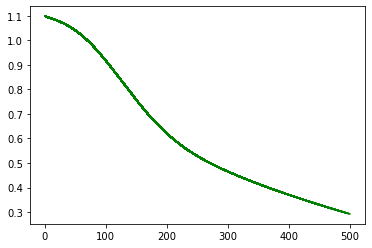

In [17]:
import matplotlib.pyplot as plt
x=[]
y=0
listacusto=[]
epochs = 500 #(or however many iterations you want it to run)
for _ in range(epochs):
    y=y+1
    x.append(y)
    with tf.GradientTape() as tp:
        #print('b1antes:',b1)
        #print('w1antes:',w1)
        #your loss/cost function must always be contained within the gradient tape instantiation
        cost_fn = cost(w1,b1,wout,bout)
        listacusto.append(cost_fn)
        plt.plot(x, listacusto, '-g', label='Custo')
    gradients = tp.gradient(cost_fn, trainable_vars)
    optimizer.apply_gradients(zip(gradients, trainable_vars))
    #print('custo:',cost_fn)
    #print('w1depois:',w1)
    #print('b1depois:',b1)
    #print('wout:',wout)
    #print('bout:',bout)

In [18]:
#Calcular a acurácia do modelo
#Calcular as previsoes do modelo e comparar com os yteste
layer1=tf.nn.relu(tf.add(tf.matmul(xteste,w1),b1))
#saida=tf.round(tf.nn.softmax(tf.add(tf.matmul(layer1,wout),bout))) função round
#saida=tf.add(tf.matmul(layer1,wout),bout)
saida=tf.nn.softmax(tf.add(tf.matmul(layer1,wout),bout))
tf.reduce_sum(saida[0, :]) # Each sample in the batch now sums to 1
#tf.round(tf.nn.sigmoid([saida]))
#tf.round(tf.nn.sigmoid([.1])) #If you want to round the values to get 0 or 1, use tf.round:

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

In [19]:
#A função round deixou o array com um aspecto mais facil de ler, porem ainda nao reduziu os valores em 0 ou 1
#Algumas previsoes ficaram apenas com zeros...
saida

<tf.Tensor: shape=(45, 3), dtype=float64, numpy=
array([[6.45003040e-02, 6.87676813e-01, 2.47822883e-01],
       [4.54888704e-03, 2.79066042e-01, 7.16385071e-01],
       [2.79655623e-03, 2.05140706e-01, 7.92062738e-01],
       [9.57513204e-01, 4.17413921e-02, 7.45403485e-04],
       [1.66797731e-03, 2.09443397e-01, 7.88888626e-01],
       [1.27563777e-01, 6.75677446e-01, 1.96758777e-01],
       [9.37635548e-01, 6.12027553e-02, 1.16169644e-03],
       [1.70435238e-02, 4.81757632e-01, 5.01198844e-01],
       [9.19439538e-01, 7.88306230e-02, 1.72983940e-03],
       [2.86541483e-02, 5.41936669e-01, 4.29409183e-01],
       [2.88404031e-02, 5.58614161e-01, 4.12545436e-01],
       [1.09070873e-02, 4.29315930e-01, 5.59776983e-01],
       [1.89717102e-03, 2.19094618e-01, 7.79008211e-01],
       [1.40216494e-03, 1.96124668e-01, 8.02473167e-01],
       [9.36753024e-01, 6.20125212e-02, 1.23445523e-03],
       [9.08343301e-01, 8.94714180e-02, 2.18528074e-03],
       [8.65959758e-03, 3.87701830e-01,

In [20]:
saida.shape

TensorShape([45, 3])

In [21]:
#teste identificaçao dos valores numa matriz
saida[1,2]

<tf.Tensor: shape=(), dtype=float64, numpy=0.7163850708780228>

In [22]:
#teste 
import numpy as np
saida2=np.array([[0.3, 0.5, 0.2],[0.5,0.3,0.2],[0.2,0.3,0.5]])

In [23]:
saida2

array([[0.3, 0.5, 0.2],
       [0.5, 0.3, 0.2],
       [0.2, 0.3, 0.5]])

In [24]:
saida2[0,2]

0.2

In [25]:
saida2=np.array(saida)

In [26]:
saida2

array([[6.45003040e-02, 6.87676813e-01, 2.47822883e-01],
       [4.54888704e-03, 2.79066042e-01, 7.16385071e-01],
       [2.79655623e-03, 2.05140706e-01, 7.92062738e-01],
       [9.57513204e-01, 4.17413921e-02, 7.45403485e-04],
       [1.66797731e-03, 2.09443397e-01, 7.88888626e-01],
       [1.27563777e-01, 6.75677446e-01, 1.96758777e-01],
       [9.37635548e-01, 6.12027553e-02, 1.16169644e-03],
       [1.70435238e-02, 4.81757632e-01, 5.01198844e-01],
       [9.19439538e-01, 7.88306230e-02, 1.72983940e-03],
       [2.86541483e-02, 5.41936669e-01, 4.29409183e-01],
       [2.88404031e-02, 5.58614161e-01, 4.12545436e-01],
       [1.09070873e-02, 4.29315930e-01, 5.59776983e-01],
       [1.89717102e-03, 2.19094618e-01, 7.79008211e-01],
       [1.40216494e-03, 1.96124668e-01, 8.02473167e-01],
       [9.36753024e-01, 6.20125212e-02, 1.23445523e-03],
       [9.08343301e-01, 8.94714180e-02, 2.18528074e-03],
       [8.65959758e-03, 3.87701830e-01, 6.03638573e-01],
       [1.48689399e-03, 2.05726

In [27]:
#Conversao da matriz saida: valores de probabilidades em 0 ou 1
for i in range(45):
    if saida2[i,0] > saida2[i,1] and saida2[i,0] > saida2[i,2]:
        saida2[i,0]=1
        saida2[i,1]=0
        saida2[i,2]=0
    if saida2[i,1] > saida2[i,0] and saida2[i,1] > saida2[i,2]:
        saida2[i,1]=1
        saida2[i,0]=0
        saida2[i,2]=0
    if saida2[i,2] > saida2[i,0] and saida2[i,2] > saida2[i,1]:
        saida2[i,2]=1
        saida2[i,1]=0
        saida2[i,0]=0
    #print(saida2[i,0],saida2[i,1],saida2[i,2])

In [28]:
saida2.shape

(45, 3)

In [29]:
yteste.shape

(45, 3)

In [30]:
yteste

,setosa,versicolor,virginica
82,0,1,0
134,0,0,1
114,0,0,1
42,1,0,0
109,0,0,1
57,0,1,0
1,1,0,0
70,0,1,0
25,1,0,0
84,0,1,0


In [31]:
yteste2=np.array(yteste)

In [32]:
saida2

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [33]:
yteste2

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [34]:
#Comparaçao entre matrizes, para calculo da acuracia
acuracia=0
for j in range(45):
    resultado0=0
    resultado1=0
    resultado2=0
    if saida2[j,0]==yteste2[j,0]:
        resultado0=1
    if saida2[j,1]==yteste2[j,1]:
        resultado1=1
    if saida2[j,2]==yteste2[j,2]:
        resultado2=1
    somaresultado=resultado0+resultado1+resultado2
    if somaresultado==3:
        acuracia=acuracia+1
    #print(j)
acuraciapercent=acuracia/(j+1) #j varia de 0 a 44

In [35]:
acuraciapercent #Acuracia calculada manualmente

0.9555555555555556

In [36]:
#Codigo do Natanael
verificacao=tf.equal(tf.argmax(saida,1),tf.argmax(yteste,1))
acuracia1=tf.math.reduce_mean(tf.cast(verificacao,tf.float32))
verificacao

<tf.Tensor: shape=(45,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])>

In [37]:
saida3=tf.argmax(saida,1) #converte o maior valor da linha em um numero de classificaçao
#Exemplo:[0.07090477, 0.68534094, 0.24375429] = 1, pois o maior valor esta na segunda coluna. O valor é um, pois a primeira
#coluna possui indice zero.
saida3

<tf.Tensor: shape=(45,), dtype=int64, numpy=
array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1], dtype=int64)>

In [38]:
#Na matriz yteste, a funçao argmax ira indicar a coluna do maior valor encontrado numa linha
yteste3=tf.argmax(yteste,1)
yteste3

<tf.Tensor: shape=(45,), dtype=int64, numpy=
array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1], dtype=int64)>

In [39]:
acuracia1 #Acuracia calculada com auxilio das funçoes do tensorflow

<tf.Tensor: shape=(), dtype=float32, numpy=0.95555556>